In [5]:
import uuid
from uuid import UUID
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
class GenomeSimulator:
    def __init__(self):
        self.generation = 1
        self.people = dict()
    
    def setup(self):
        for _ in range(32):
            value = uuid.uuid4()
            self.people[value] = {'name':value,
                                  'genome': [value] * 20_000,
                                  'generation': self.generation,
                                  'sex':random.randint(0,1),
                                  'birth_year':random.randint(0,10),
                                  'partner': None}
            
    def make_partners(self):
        self.generation += 1
        candidates = {key:value for key, value in self.people.items() if value['partner'] is None}
        males = {key:value for key, value in candidates.items() if value['sex'] == 1}
        females = {key:value for key, value in candidates.items() if value['sex'] == 0}
        for count in range(min([len(males),len(females)])):
            for child in range(1,4):
                genome = []
                father = list(males.values())[count]
                mother = list(females.values())[count]
                candidates[father['name']]['partner'] = mother['name']
                candidates[mother['name']]['partner'] = father['name']
                similarity = 0
                for gene in range(20_000):
                    if father['genome'][gene] == mother['genome'][gene]:
                        similarity += 1
                    if random.randint(0,1) == 0:
                        genome.append(father['genome'][gene])
                    else:
                        genome.append(mother['genome'][gene])
                
                if similarity > 200:
                    break
                new_name = uuid.uuid4()
                birth_year = max(father['birth_year'], mother['birth_year']) + random.randint(20,35)
                self.people[new_name] = {'name':new_name,
                                         'genome': genome,
                                         'generation': generation,
                                         'sex': random.randint(0,1),
                                         'birth_year': birth_year,
                                        'partner': None}

In [22]:
def genome_similarity(person_a, person_b):
    matching = 0
    for gene in range(20_000):
        if person_a['genome'][gene] == person_b['genome'][gene]:
            matching += 1
    return matching / 20_000 * 100

In [7]:
simulation = GenomeSimulator()
simulation.setup()
len(simulation.people.items())

32

In [8]:
for generation in range(1,20):
    simulation.make_partners()
    print("generation %s: %s" % (generation, datetime.now()))

generation 1: 2023-03-13 20:50:12.572673
generation 2: 2023-03-13 20:50:13.481264
generation 3: 2023-03-13 20:50:14.532169
generation 4: 2023-03-13 20:50:14.990491
generation 5: 2023-03-13 20:50:15.026342
generation 6: 2023-03-13 20:50:15.026402
generation 7: 2023-03-13 20:50:15.026422
generation 8: 2023-03-13 20:50:15.026439
generation 9: 2023-03-13 20:50:15.026456
generation 10: 2023-03-13 20:50:15.026491
generation 11: 2023-03-13 20:50:15.026508
generation 12: 2023-03-13 20:50:15.026537
generation 13: 2023-03-13 20:50:15.026554
generation 14: 2023-03-13 20:50:15.026570
generation 15: 2023-03-13 20:50:15.026586
generation 16: 2023-03-13 20:50:15.026602
generation 17: 2023-03-13 20:50:15.026619
generation 18: 2023-03-13 20:50:15.026635
generation 19: 2023-03-13 20:50:15.026651


In [9]:
len(simulation.people)

176

In [10]:
Counter([x['sex'] for x in simulation.people.values()])

Counter({0: 85, 1: 91})

In [ ]:
Counter([x['sex'] for x in simulation.people.values() if x['partner'] is None])

In [11]:
simulation.generation

20

In [13]:
list(simulation.people.values())[-1]

{'name': UUID('2a2fc297-c420-4dc8-9652-6124dc5149e8'),
 'genome': [UUID('21055ca6-22ad-44a2-ac19-b0b0e04ba326'),
  UUID('a6d6f4eb-d7ce-4b85-aedf-140e5bd793de'),
  UUID('365556d3-8312-4956-b0e3-aa94712f6be4'),
  UUID('0f42f7d1-bdb1-4435-a0ee-97612fb1ad06'),
  UUID('073aa27a-db60-4e6e-bf03-b30dabcb3483'),
  UUID('a6d6f4eb-d7ce-4b85-aedf-140e5bd793de'),
  UUID('8b8600fa-eaa2-4b20-90d3-7de54189d238'),
  UUID('21055ca6-22ad-44a2-ac19-b0b0e04ba326'),
  UUID('e54d1a87-17f4-453b-90a3-654812a6afdb'),
  UUID('b015b5d8-702f-4161-94ad-ba84cc4a3a68'),
  UUID('073aa27a-db60-4e6e-bf03-b30dabcb3483'),
  UUID('9b831628-16e0-4466-af9b-070918cd8887'),
  UUID('eb02d9f7-1f0e-44c9-8d33-b800527fc40e'),
  UUID('405f9c26-401e-4d51-b5ce-4f6540fa6208'),
  UUID('073aa27a-db60-4e6e-bf03-b30dabcb3483'),
  UUID('eb02d9f7-1f0e-44c9-8d33-b800527fc40e'),
  UUID('0f42f7d1-bdb1-4435-a0ee-97612fb1ad06'),
  UUID('0f42f7d1-bdb1-4435-a0ee-97612fb1ad06'),
  UUID('405f9c26-401e-4d51-b5ce-4f6540fa6208'),
  UUID('53596310-a9d4-4

In [ ]:
l1 = []
count = 0
for item in simulation.people.values():
    if item['genome'] not in l1:
        count += 1
        l1.append(item['genome'])

In [ ]:
count

In [ ]:
len(simulation.people)

In [14]:
unpartnered = pd.DataFrame(Counter([x['birth_year'] for x in simulation.people.values() if x['partner'] is None]).items()).sort_values(1)

In [15]:
unpartnered

,0,1
0,94,1
1,93,1
2,81,1
3,101,1
4,102,1
5,124,1


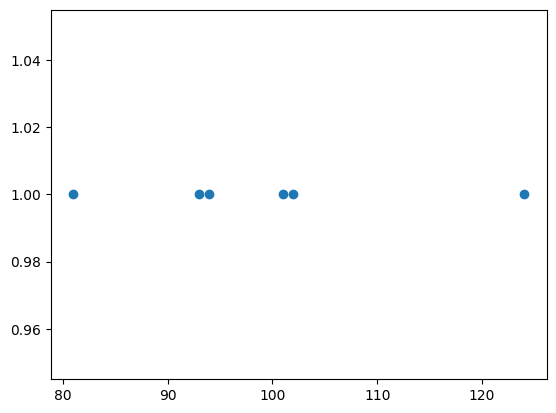

In [16]:
plt.scatter(x=unpartnered[0], y=unpartnered[1])

In [17]:
Counter([x['generation'] for x in simulation.people.values() if x['partner'] is None])

Counter({3: 5, 4: 1})

In [18]:
datetime.now()

datetime.datetime(2023, 3, 13, 20, 51, 30, 235074)

In [21]:
Counter([x['generation'] for x in simulation.people.values()])

Counter({1: 74, 2: 45, 3: 54, 4: 3})

In [25]:
last_generation = [x['name'] for x in simulation.people.values() if x['generation'] == 4]

[UUID('3cd808d1-7e71-4557-8527-5a917d056385'),
 UUID('1ff64efd-5eb4-47f0-bc18-e79726e93d56'),
 UUID('2a2fc297-c420-4dc8-9652-6124dc5149e8')]